In [ ]:

# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(r"/content/logit classification.csv")
#this datasset contian information of user and socianl network, those features are - userid,gender,age,salary,purchased
#social network has several business client which can put their into social networks and one of the client is car company , this company has newly lunched XUV in rediculous price or high price
#we will see which of the user in this social network are going to buy brand new xuv car
#Last column tell us user purchased the car yes-1 // no-0 & we are going to build the model that is goint to predict if the user is going to buy xuv or not based on 2 variable based on age & estimated salery
#so our matrix of feature is only these 2 column & we gonna find some corelation b/w age and estimated salary of user and his decission to purchase the car [yes or no]
#so i need 2 index and rest of index i will remove for this i have to use slicing operator
#1 means - the user going to buy the car & 0 means - user is not going to buy the car


X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#for this observation let me selcted as 100 observaion for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

#we are going to predict which users are going to predit xuv,

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#we mentioned feature scaling only to independent variable not dependent variable at all

#datapreprocessing done guys upto this part

#******************************************************************************************

#Next step is we are going to build the logistic model and appy this model into our dataset
#This is linear model library thats why we called from sklear.linear_model

# Training the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
Scikit-learn is built on NumPy, SciPy, and matplotlib libraries. It is a simple and efficient tool for predictive data analysis.
The sklearn. preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators. In general, learning algorithms benefit from standardization of the data set.
Preprocessing
The sklearn.preprocessing package provides various functions that help in changing raw features into a representation that is more suitable for machine learning models.

The following are a list of main functions we will be focusing in this blog:

Standardization
Normalization
Encoding categorical features
Discretization
Imputation of missing values
Generating polynomial features
Custom transformers
classifier = LogisticRegression()
What is LogisticRegression in Python?
Building A Logistic Regression in Python, Step by Step | by ...
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).
classifier.fit(X_train, y_train)
#we have to fit the logistic regression model to our training set

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#now you compare X_test with y_pred, x-test we have age and salary ,
#if u look at the first observation this user is not be able to buy the car but if you look at observation 7 then that user is going to buy the car
#in this case logistic regression model classify the which users are going to buy the car or not

#we build our logistic model and fit it to the training set & we predict our test set result


#now we will use the confusion matrix to evalute

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#we can say that 65 + 24 = 89 correct prediction we found & 8+3 = 11 incorrect prediction made


# This is to get the Models Accuracy
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)


# This is to get the Classification Report
from sklearn.metrics import classification_report
Understanding a Classification Report For Your Machine Learning Model. The classification report visualizer displays the precision, recall, F1, and support scores for the model. There are four ways to check if the predictions are right or wrong: TN / True Negative: the case was negative and predicted negative.
cr = classification_report(y_test, y_pred)
cr


bias = classifier.score(X_train, y_train)
bias
What is score () in Python?
Python/Sklearn] How does .score() works? | Kaggle
score(X_train,Y_train) is measuring the accuracy of the model against the training data. (How well the model explains the data it was trained with).
variance = classifier.score(X_test, y_test)
variance




#********************************************************************************************************************
'''
#Now we gonna see the visulization

# Visualising the Training set results
from matplotlib.colors import ListedColormap
ListedColormap class is used to create colormap objects from a list of colors. This can be useful for directly indexing into colormap and it can also be used to create special colormaps for normal mapping. Syntax: class matplotlib. colors.
Colormap object generated from a list of colors.

This may be most useful when indexing directly into a colormap, but it can also be used to generate special colormaps for ordinary mapping.
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
What is Meshgrid in Python?
In Python, meshgrid is a function that creates a rectangular grid out of 2 given 1-dimensional arrays that denote the Matrix or Cartesian indexing. MATLAB inspires it. This meshgrid function is provided by the module numpy. Coordinate matrices are returned from the coordinate vectors.
Why do we use Meshgrid in Python?
python - What is the purpose of meshgrid in NumPy? - Stack ...
The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values. So, for example, if we want to create a grid where we have a point at each integer value between 0 and 4 in both the x and y directions.
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#after execute this graph we will get the good graph & lets try to understand and analyse the graph step by step
#we have points like red point & green points, all these points are our observation of the training part
#each of the user's age is estimated at the x-axis & estimated salary are estimated at y-axis
#red points are the training set observation which the dependent variable purchased equal to 0
# green points are the training set observation which the dependent variable puchased equal to 1
#red points users are didnt able to buy the suv & green points users are able to buy the xuv
#what we observed hear is users are young with low estimate salary actually didnt buy the xuv
#if you look at the users with older with high salary they will buy the xuv & xuv is family car so more older people are likely to buy this car
#now if you see some green points you can see in the red part , in this case even though older but due to less salary they are unable to buy car
#also some of the young people are also buy the car becuase of rich kid

#now what is the goal of classification & what classifer exactly do hear & how this classifier will do for this business case
#the main goal is classify the right users into right category that machine will do by logistic regression using s -curve
#the machine classify all dataset in 2 region, left region is to classify who not buy the car and the green is to classify who can buy the car
#logisti regression model ploted red pooint users are not going to buy the XUV and green point users are going to buy the xuv
#logistic regression will tells that each user in the dataset is proper classified based on age & salary
#main important thing is these are the 2 prediction (red & green) separated by straight line & the straight line is calle prediction boundry
#as we are talking logistice regression os linear model so we will requred only for 2 variable & sepated with straight line and logistic regressin is linear classifer
#we will see next classed how non-linear classifier will separte wont be straight line
#even though if you see the green point even though low salary they buy the xuv which is incorrect
#if you see the green points are belongs to the red regions this happen becuae users are non-linear but we separate with linear model thats why we got this prediction
#now we are looking visualiaton for traing set & next we going to see the visualization for test set
#


# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#lets see the graph we get good graph we have plotted for the test data point
#if you see the confustion matrix we saw 11 points are incorrectly predicted hear , you can count that
#we build our first classification model in python '''

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(r"/content/logit classification.csv")
dataset


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [4]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [6]:
from sklearn.model_selection import train_test_split
#for this observation let me selcted as 100 observaion for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

#we are going to predict which users are going to predit xuv,

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [8]:
X_test

array([[-7.98950822e-01,  4.94607583e-01],
       [-2.12648508e-02, -5.77359062e-01],
       [-3.12897090e-01,  1.46942725e-01],
       [-7.98950822e-01,  2.62831011e-01],
       [-3.12897090e-01, -5.77359062e-01],
       [-1.09058306e+00, -1.44652121e+00],
       [-7.01740076e-01, -1.59138156e+00],
       [-2.15686344e-01,  2.14601566e+00],
       [-1.96547978e+00, -5.58617754e-02],
       [ 8.53631867e-01, -7.80163563e-01],
       [-7.98950822e-01, -6.06331134e-01],
       [-9.93372315e-01, -4.32498705e-01],
       [-1.18475597e-01, -4.32498705e-01],
       [ 7.59458956e-02,  2.04886868e-01],
       [-1.77105829e+00,  4.65635512e-01],
       [-6.04529329e-01,  1.36376973e+00],
       [-1.18475597e-01,  2.04886868e-01],
       [-1.86826903e+00,  4.36663440e-01],
       [ 1.63131784e+00,  1.74040666e+00],
       [-3.12897090e-01, -1.38857706e+00],
       [-3.12897090e-01, -6.64275277e-01],
       [ 8.53631867e-01,  2.14601566e+00],
       [ 2.70367388e-01, -5.48386991e-01],
       [ 8.

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
#we have to fit the logistic regression model to our training set

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#now you compare X_test with y_pred, x-test we have age and salary ,
#if u look at the first observation this user is not be able to buy the car but if you look at observation 7 then that user is going to buy the car
#in this case logistic regression model classify the which users are going to buy the car or not

#we build our logistic model and fit it to the training set & we predict our test set result


#now we will use the confusion matrix to evalute

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57  1]
 [ 5 17]]


In [10]:
classifier.fit(X_train, y_train)
#we have to fit the logistic regression model to our training set

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#now you compare X_test with y_pred, x-test we have age and salary ,
#if u look at the first observation this user is not be able to buy the car but if you look at observation 7 then that user is going to buy the car
#in this case logistic regression model classify the which users are going to buy the car or not

#we build our logistic model and fit it to the training set & we predict our test set result


#now we will use the confusion matrix to evalute

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57  1]
 [ 5 17]]


In [11]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)


# This is to get the Classification Report
from sklearn.metrics import classification_report
#Understanding a Classification Report For Your Machine Learning Model. The classification report visualizer displays the precision, recall, F1, and support scores for the model. There are four ways to check if the predictions are right or wrong: TN / True Negative: the case was negative and predicted negative.
cr = classification_report(y_test, y_pred)
cr


bias = classifier.score(X_train, y_train)
bias
"""What is score () in Python?
Python/Sklearn] How does .score() works? | Kaggle
score(X_train,Y_train) is measuring the accuracy of the model against the training data. (How well the model explains the data it was trained with).
"""
variance = classifier.score(X_test, y_test)
variance


0.925


0.925

<ipython-input-17-3b3f81ea880d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


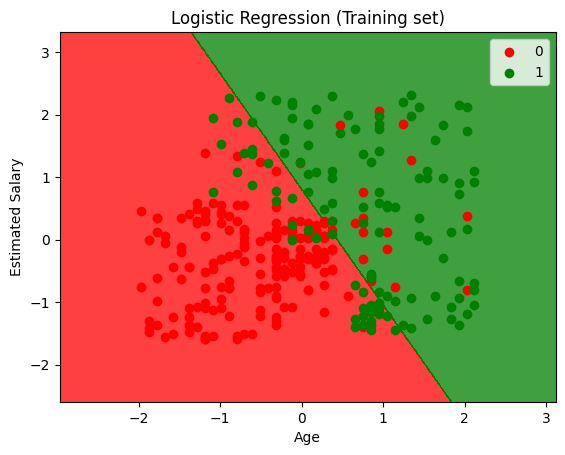

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
"""What is Meshgrid in Python?
In Python, meshgrid is a function that creates a rectangular grid out of 2 given 1-dimensional arrays that denote the Matrix or Cartesian indexing. MATLAB inspires it. This meshgrid function is provided by the module numpy. Coordinate matrices are returned from the coordinate vectors.
Why do we use Meshgrid in Python?
python - What is the purpose of meshgrid in NumPy? - Stack ...
The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values. So, for example, if we want to create a grid where we have a point at each integer value between 0 and 4 in both the x and y directions.
"""
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()